In [3]:
# import argparse
# import os
# import json
# from pathlib import Path

# import numpy as np
# import torchvision
# import pytorch_lightning as pl
# from pytorch_lightning.callbacks import ModelCheckpoint

# from multimodal.multimodal_data_module import MultiModalSAYCamDataModule, read_vocab, LabeledSEvalDataset
# from multimodal.multimodal import MultiModalModel
import torch
from multimodal.multimodal_lit import MultiModalLitModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

spatial_embedding_checkpoint = "/misc/vlgscratch4/LakeGroup/shared_data/S_multimodal/checkpoints/multimodal-epoch=99.ckpt"
model = MultiModalLitModel.load_from_checkpoint(spatial_embedding_checkpoint, map_location=device)
print(model.hparams["args"])

Namespace(accelerator=None, accumulate_grad_batches=1, alpha=1.0, amp_backend='native', amp_level='O2', augment_frames=True, auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, batch_size=8, benchmark=False, bidirectional=True, check_val_every_n_epoch=1, checkpoint_callback=True, default_root_dir=None, deterministic=False, devices=None, distributed_backend=None, embedding_dim=512, embedding_type='spatial', exp_name='multimodal_embedding_dim_512_batch_size_8_lr_0.0003', fast_dev_run=False, finetune_cnn=False, flush_logs_every_n_steps=100, gpus=1, gradient_clip_algorithm='norm', gradient_clip_val=0.0, input_dim=5589, ipus=None, limit_predict_batches=1.0, limit_test_batches=1.0, limit_train_batches=1.0, limit_val_batches=1.0, log_every_n_steps=50, log_gpu_memory=None, logger=True, lr=0.0003, max_epochs=100, max_steps=None, max_time=None, min_epochs=None, min_steps=None, move_metrics_to_cpu=False, multiple_frames=True, multiple_trainloader_mode='max_size_cycle', normal

In [2]:
# directories and filenames
DATA_DIR = Path("/misc/vlgscratch4/LakeGroup/shared_data/S_multimodal")
EVAL_FRAMES_DIRNAME = DATA_DIR / "eval"
TRAIN_METADATA_FILENAME = DATA_DIR / "train.json"
VAL_METADATA_FILENAME = DATA_DIR / "val.json"
TEST_METADATA_FILENAME = DATA_DIR / "test.json"
EVAL_DEV_METADATA_FILENAME = DATA_DIR / "eval_dev.json"
EVAL_TEST_METADATA_FILENAME = DATA_DIR / "eval_test.json"
VOCAB_FILENAME = DATA_DIR / "vocab.json"

with open(TRAIN_METADATA_FILENAME) as f:
    train_data = json.load(f)
    train_data = train_data["data"]

with open(VAL_METADATA_FILENAME) as f:
    val_data = json.load(f)
    val_data = val_data["data"]

with open(TEST_METADATA_FILENAME) as f:
    test_data = json.load(f)
    test_data = test_data["data"]

with open(EVAL_DEV_METADATA_FILENAME) as f:
    eval_dev_data = json.load(f)
    eval_dev_data = eval_dev_data["data"]

with open(EVAL_TEST_METADATA_FILENAME) as f:
    eval_test_data = json.load(f)
    eval_test_data = eval_test_data["data"]

# read vocab
def read_vocab(vocab_filename=VOCAB_FILENAME):
    with open(vocab_filename) as f:
        return json.load(f)

# get vocab and reverse
vocab = read_vocab()
vocab_idx2word = dict((v,k) for k,v in vocab.items())

def label_to_category(i):
    label_idx = i.item()
    return vocab_idx2word[label_idx]

# create eval datasets
eval_dev_dataset = LabeledSEvalDataset(eval_dev_data, vocab)
eval_test_dataset = LabeledSEvalDataset(eval_test_data, vocab)

# create dataloaders
eval_dev_dataloader = torch.utils.data.DataLoader(eval_dev_dataset, batch_size=1, shuffle=False)
eval_test_dataloader = torch.utils.data.DataLoader(eval_test_dataset, batch_size=1, shuffle=False)

In [5]:
# load spatial embedding model
# spatial_embedding_checkpoint = \
#     '../checkpoints/multimodal_embedding_type_spatial_text_encoder_embedding_batch_size_16/epoch=90.ckpt'
spatial_embedding_checkpoint = "/home/wv9/code/WaiKeen/multimodal-baby/checkpoints/multimodal_embedding_dim_512_batch_size_8_lr_0.0003/epoch=99.ckpt"
model = MultiModalLitModel.load_from_checkpoint(spatial_embedding_checkpoint, map_location=device)
print(model.hparams)
model.eval()


"args":  Namespace(accelerator=None, accumulate_grad_batches=1, alpha=1.0, amp_backend='native', amp_level='O2', augment_frames=True, auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, batch_size=8, benchmark=False, bidirectional=True, check_val_every_n_epoch=1, checkpoint_callback=True, default_root_dir=None, deterministic=False, devices=None, distributed_backend=None, embedding_dim=512, embedding_type='spatial', exp_name='multimodal_embedding_dim_512_batch_size_8_lr_0.0003', fast_dev_run=False, finetune_cnn=False, flush_logs_every_n_steps=100, gpus=1, gradient_clip_algorithm='norm', gradient_clip_val=0.0, input_dim=5589, ipus=None, limit_predict_batches=1.0, limit_test_batches=1.0, limit_train_batches=1.0, limit_val_batches=1.0, log_every_n_steps=50, log_gpu_memory=None, logger=True, lr=0.0003, max_epochs=100, max_steps=None, max_time=None, min_epochs=None, min_steps=None, move_metrics_to_cpu=False, multiple_frames=True, multiple_trainloader_mode='max_size_cycle

MultiModalLitModel(
  (model): MultiModalModel(
    (image_embed): VisionEncoder(
      (model): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (4): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): BatchNorm2d(256, eps=1e-05, momentum

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


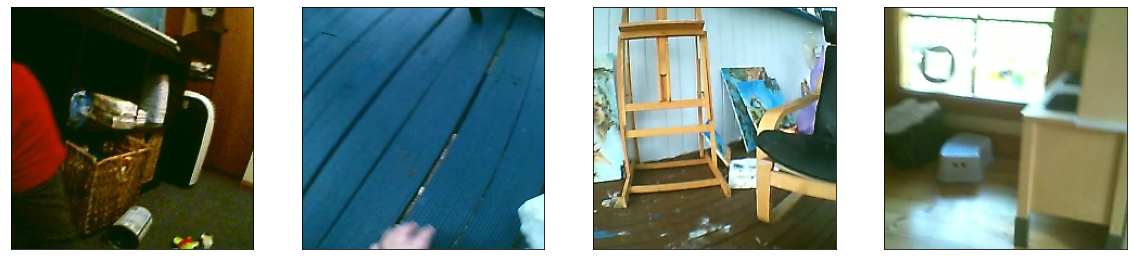

label: basket


In [176]:
# load a single example
# imgs, label, label_len = next(iter(eval_dev_dataloader))
imgs, label, label_len = eval_dev_dataset.__getitem__(101)

# inverse normalization step
from torchvision import transforms
n_inv = transforms.Normalize([-0.485/0.229, -0.546/0.224, -0.406/0.225], [1/0.229, 1/0.224, 1/0.225])

# display images
imgs = imgs.squeeze(0)
inv_imgs = n_inv(imgs)

import matplotlib.pyplot as plt

# extract first image from each batch
plt.figure(figsize=(20, 10))
for i in range(4):
    img = inv_imgs[i].permute((1, 2, 0))

    plt.subplot(1, 4, i+1)
    plt.imshow(img.detach().numpy())
    plt.xticks([])
    plt.yticks([])

plt.show()
    
# get label text
print("label:", label_to_category(label))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1])
torch.Size([4, 512, 7, 7])
torch.Size([1, 1, 512])


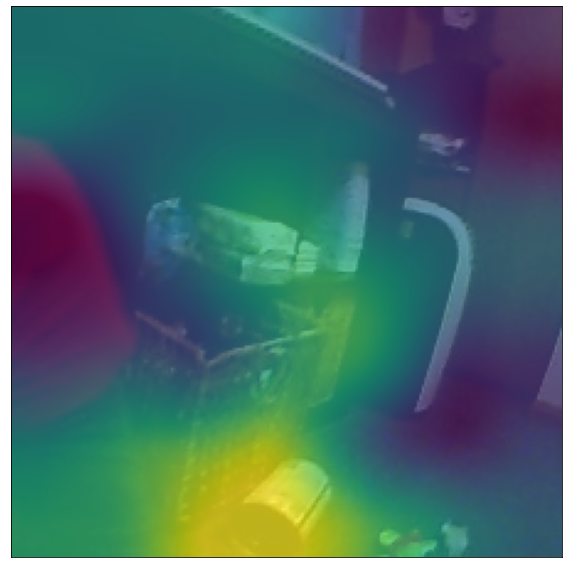

In [177]:
import cv2
import torch.nn.functional as F

# calculate matchmap
imgs = imgs.to(device)
label = label.unsqueeze(0).to(device)

print(label.size())

image_features = model.model.encode_image(imgs)
text_features = model.model.encode_text(label, label_len)

print(image_features.size())
print(text_features.size())

match_sum = torch.einsum('iehw,tle->ithw', [image_features, text_features])  # calculate matchmap
match = match_sum / (label_len)
match = match[0].squeeze()

match = F.normalize(match)

curr_heatmap = cv2.resize(match.cpu().detach().numpy(), (224, 224),
                                      interpolation=cv2.INTER_CUBIC)



fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.imshow(inv_imgs[0].permute((1, 2, 0)).cpu().numpy())
plt.imshow(curr_heatmap, alpha=0.75, vmin=torch.min(match).item(), vmax=torch.max(match).item())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect('equal')
plt.tight_layout()

In [184]:
# semantic search engine
from torchvision import transforms
from multimodal.multimodal_data_module import MultiModalSAYCamDataset

# first, set up validation dataloader
base_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
val_dataset = MultiModalSAYCamDataset(val_data, vocab, multiple_frames=False, transform=base_transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, shuffle=False, batch_size=64)

# second, get validation filenames
val_filenames = []
for i in range(len(val_data)):
    val_filename = val_data[i]["frame_filenames"][0]
    val_filenames.append(val_filename)
    
# third, get embeddings by iterating through dataloader once
val_embeddings = []
for imgs, labels, labels_len in val_dataloader:
    # skip last batch 
    if len(imgs) == 64:
        imgs = imgs.to(device)
        img_features = model.model.encode_image(imgs)
        print(img_features.size())
        val_embeddings.extend(img_features)

torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])
torch.Size([64, 512, 7, 7])


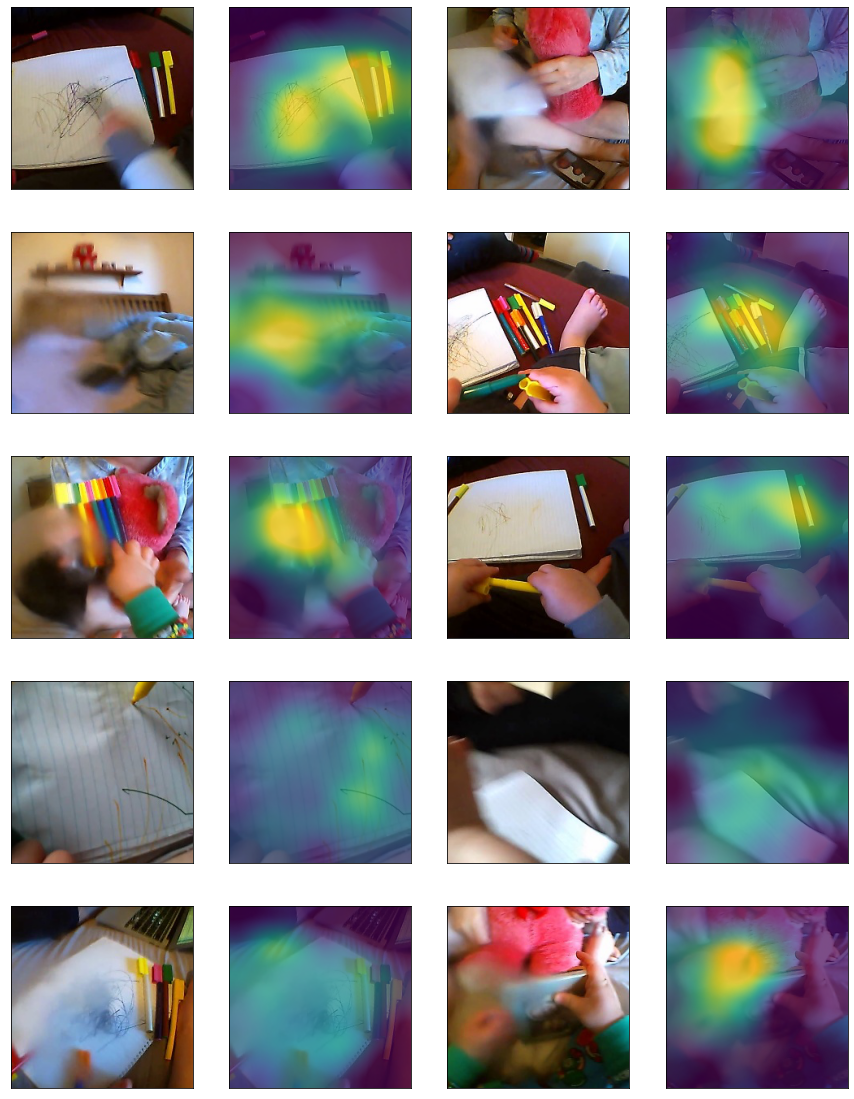

In [264]:
# fourth, get text embedding
query = "draw"
label = vocab[query]
label = torch.LongTensor([label]).to(device)
label_len = len(label)

# combine val embeddings into a torch tensor
img_embed = torch.stack(val_embeddings).to(device)
text_embed = model.model.encode_text(label, label_len).unsqueeze(0)

# fifth, calculate similarities and retrieve top k indices (k = 20)
sims = torch.einsum('iehw,tle->it', [img_embed, text_embed]).squeeze()
values, indices = torch.topk(sims, k=10)

# plot results

plt.figure(figsize=(15, 20))
plt_count = 1
for idx in indices:    
    # get frame
    frame_filename = val_filenames[idx]
    original_img = Image.open(os.path.join(DATA_DIR, "train_5fps", frame_filename))
    
    plt.subplot(5, 4, plt_count)
    plt.imshow(original_img)
    plt.xticks([])
    plt.yticks([])

    # encode img
    img = base_transform(original_img)
    img = img.unsqueeze(0).to(device)
    img_embed = model.model.encode_image(img)
 
    match_sum = torch.einsum('iehw,tle->ithw', [img_embed, text_embed])  # calculate matchmap
    match = match_sum / (label_len)
    match = match[0].squeeze()
#     match = F.normalize(match)

    curr_heatmap = cv2.resize(match.cpu().detach().numpy(), (224, 224),
                                          interpolation=cv2.INTER_CUBIC)
    
    plt.subplot(5, 4, plt_count+1)
    plt.imshow(original_img)
    plt.imshow(curr_heatmap, alpha=0.7, vmin=0, vmax=300)
    plt.xticks([])
    plt.yticks([])
    
    plt_count += 2

In [ ]:
# frame animation
from matplotlib.animation import FuncAnimation
from PIL import Image


# i = 82
# i = 28
i += 1
ball_data = [x for x in val_data if 'balls' in x['utterance']]
single_img_filenames = ball_data[i]["frame_filenames"]
print(f'{i}: {len(single_img_filenames)}')

# get text features
label = "baby"
label = torch.LongTensor([vocab[label]]).unsqueeze(0).to(device)
text_embed = model.model.encode_text(label, [1])

def animate(frame_num):
    frame_filename = single_img_filenames[frame_num]
    original_img = Image.open(os.path.join(DATA_DIR, "train_5fps", frame_filename))
    
    # encode img
    img = base_transform(original_img)
    img = img.unsqueeze(0).to(device)
    img_embed = model.model.encode_image(img)
 
    match_sum = torch.einsum('iehw,tle->ithw', [img_embed, text_embed])  # calculate matchmap
    match = match_sum / (label_len)
    match = match[0].squeeze()
#     match = F.normalize(match)

    curr_heatmap = cv2.resize(match.cpu().detach().numpy(), (224, 224),
                                          interpolation=cv2.INTER_CUBIC)
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.xticks([])
    plt.yticks([])
#     plt.imshow(curr_heatmap, alpha=0.75, vmin=torch.min(match).item(), vmax=torch.max(match).item())

    plt.subplot(1, 2, 2)
    plt.imshow(original_img)
    plt.imshow(curr_heatmap, alpha=0.7, vmin=-20, vmax=60)
    plt.xticks([])
    plt.yticks([])
    
fig, ax = plt.subplots(figsize=(8, 4))

anim = FuncAnimation(fig, animate, frames=len(single_img_filenames), interval=200)
# anim.save('ball-4.mp4', writer='ffmpeg', fps=5, dpi=100)

from IPython.display import HTML
HTML(anim.to_html5_video())


In [ ]:
print(val_utterances)

In [ ]:
total_frames = 0
for i in train_data:
    total_frames += len(i['frame_filenames'])
    
for i in val_data:
    total_frames += len(i['frame_filenames'])
    
for i in test_data:
    total_frames += len(i['frame_filenames'])
    
print(total_frames)


In [193]:
# copying eval.py code
import argparse
import json
import os
from pathlib import Path

import numpy as np
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint

from multimodal.multimodal_data_module import MultiModalSAYCamDataModule, read_vocab, LabeledSEvalDataset
from multimodal.multimodal import MultiModalModel
from multimodal.multimodal_lit import MultiModalLitModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set up dataloader
# directories and filenames
DATA_DIR = Path("/misc/vlgscratch4/LakeGroup/shared_data/S_multimodal")
EVAL_FRAMES_DIRNAME = DATA_DIR / "eval"
EVAL_DEV_METADATA_FILENAME = DATA_DIR / "eval_dev.json"
VOCAB_FILENAME = DATA_DIR / "vocab.json"

with open(EVAL_DEV_METADATA_FILENAME) as f:
    eval_dev_data = json.load(f)
    eval_dev_data = eval_dev_data["data"]

# read vocab
def read_vocab(vocab_filename=VOCAB_FILENAME):
    with open(vocab_filename) as f:
        return json.load(f)

# get vocab and reverse
vocab = read_vocab()
vocab_idx2word = dict((v,k) for k,v in vocab.items())

def label_to_category(i):
    label_idx = i.item()
    return vocab_idx2word[label_idx]

# create dataloader
eval_dev_dataset = LabeledSEvalDataset(eval_dev_data, vocab)
eval_dev_dataloader = torch.utils.data.DataLoader(eval_dev_dataset, batch_size=1, shuffle=False)

# check spatial checkpoint
# TODO: replace with best model
# spatial_embedding_checkpoint = \
#     'checkpoints/multimodal_embedding_type_spatial_text_encoder_embedding_batch_size_16/epoch=90.ckpt'

# # load model from checkpoint
# model = MultiModalLitModel.load_from_checkpoint(spatial_embedding_checkpoint, map_location=device)
# model.eval()

# get eval categories
classes = sorted(os.listdir(EVAL_FRAMES_DIRNAME / "dev"))
classes.remove("carseat")
classes.remove("couch")
classes.remove("greenery")
classes.remove("plushanimal")

# only for now
# classes.remove("cat")
# classes.append("kitty")

# initialize correct and total pred counts
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# get model predictions
with torch.no_grad():
    for batch in eval_dev_dataloader:
        img, label, label_len = batch
        img = img.squeeze(0).to(device)  # remove outer batch
        label = label.to(device)
        label_len = label_len.to(device)

        # get text category label
        class_label = label_to_category(label)
     
#         if class_label == "cat":
            # switch to kitty
#             label = torch.LongTensor([[vocab["kitty"]]]).to(device)
        
        # calculate similarity between images
        # first, get embeddings
        _, logits_per_text = model(img, label, label_len)
        pred = torch.argmax(logits_per_text, dim=-1).item()
        ground_truth = 0
     
        # get text category label
        class_label = label_to_category(label)
             
        if pred == ground_truth:
            correct_pred[class_label] += 1
        
        total_pred[class_label] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))


Accuracy for class ball  is: 65.0 %
Accuracy for class basket is: 20.0 %
Accuracy for class car   is: 80.0 %
Accuracy for class cat   is: 50.0 %
Accuracy for class chair is: 48.0 %
Accuracy for class computer is: 61.0 %
Accuracy for class crib  is: 87.0 %
Accuracy for class door  is: 49.0 %
Accuracy for class floor is: 41.0 %
Accuracy for class foot  is: 45.0 %
Accuracy for class ground is: 52.0 %
Accuracy for class hand  is: 23.0 %
Accuracy for class kitchen is: 60.0 %
Accuracy for class paper is: 81.0 %
Accuracy for class puzzle is: 78.0 %
Accuracy for class road  is: 68.0 %
Accuracy for class room  is: 50.0 %
Accuracy for class sand  is: 96.0 %
Accuracy for class stairs is: 80.0 %
Accuracy for class table is: 70.0 %
Accuracy for class toy   is: 28.0 %
Accuracy for class window is: 57.0 %


In [195]:
correct_pred

{'ball': 65,
 'basket': 20,
 'car': 80,
 'cat': 50,
 'chair': 48,
 'computer': 61,
 'crib': 87,
 'door': 49,
 'floor': 41,
 'foot': 45,
 'ground': 52,
 'hand': 23,
 'kitchen': 60,
 'paper': 81,
 'puzzle': 78,
 'road': 68,
 'room': 50,
 'sand': 96,
 'stairs': 80,
 'table': 70,
 'toy': 28,
 'window': 57}

Text(0, 0.5, 'Evaluation Accuracy')

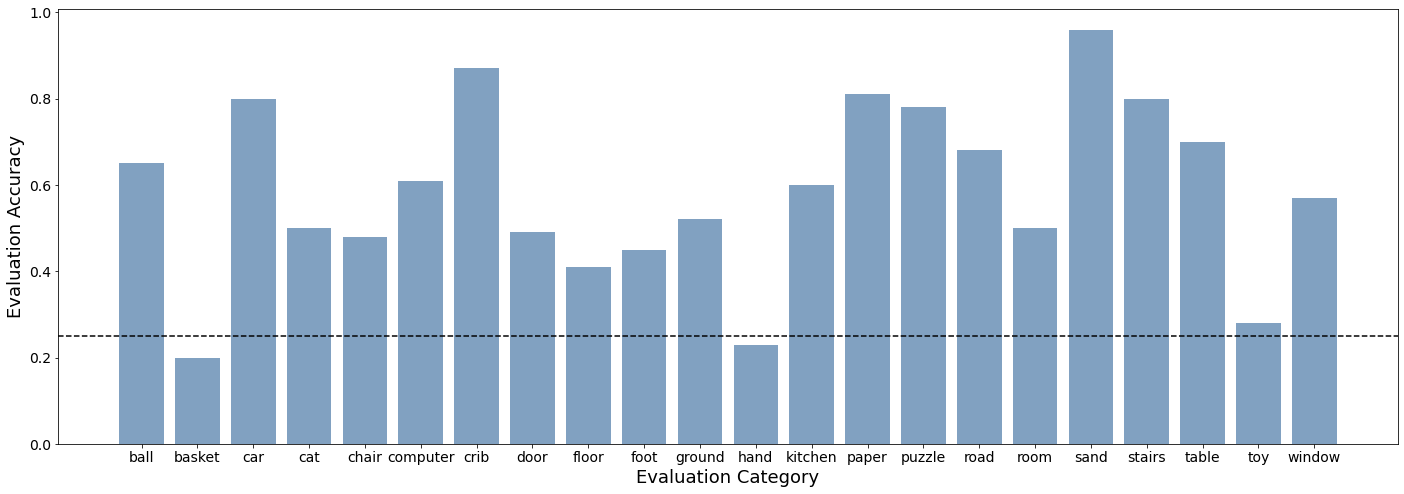

In [240]:
categories = correct_pred.keys()
accuracy = [x/100 for x in correct_pred.values()]
cm = plt.get_cmap('Pastel1', len(categories)) 
cm

plt.figure(figsize=(24, 8))
plt.bar(categories, accuracy, color="#81A1C1")
plt.axhline(y=0.25, linestyle='--', color="black")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Evaluation Category", fontsize=18)
plt.ylabel("Evaluation Accuracy", fontsize=18)

In [228]:
np.mean(accuracy)

0.5859090909090908